#### 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.read_csv(os.getcwd() + '/vehicle.csv')
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [2]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [3]:
df.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [4]:
df = df.fillna(df.mean())
df.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

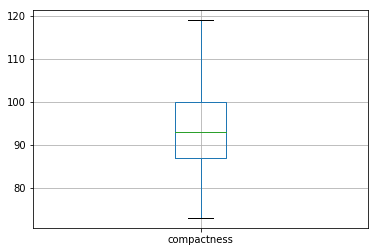

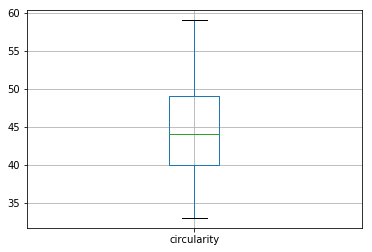

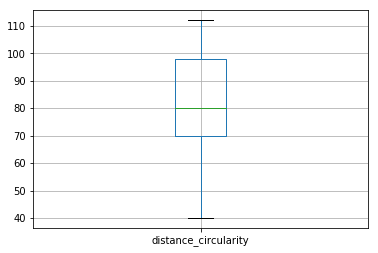

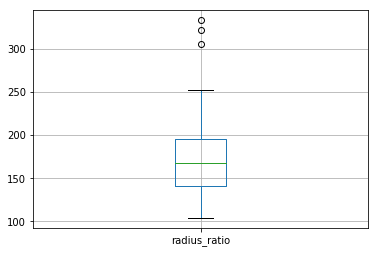

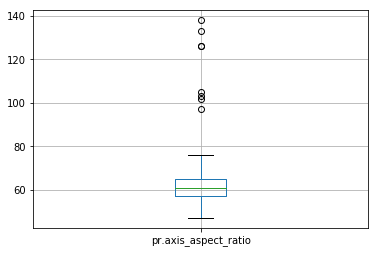

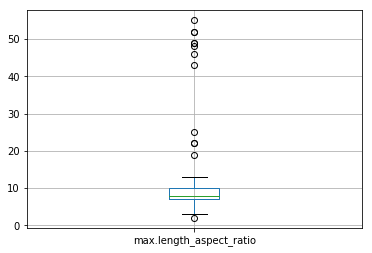

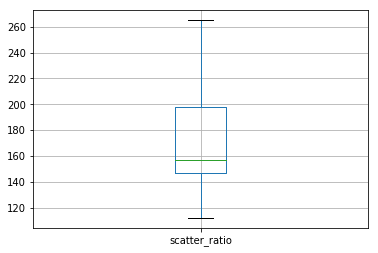

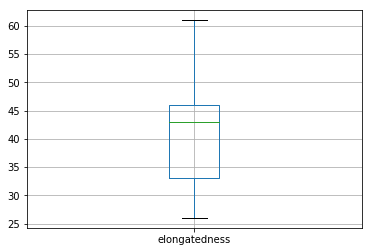

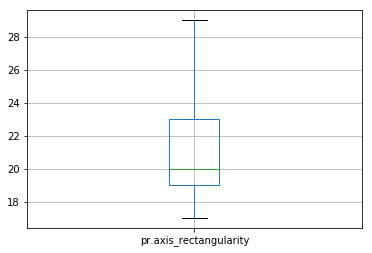

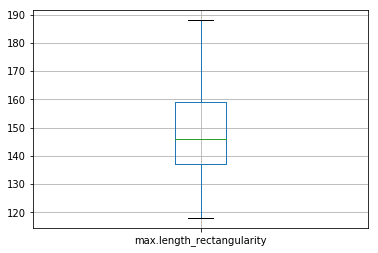

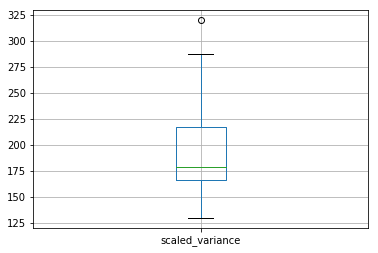

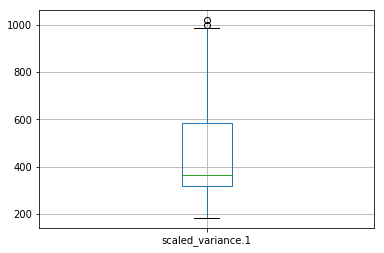

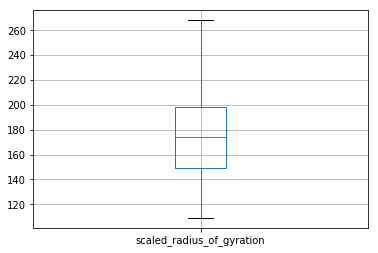

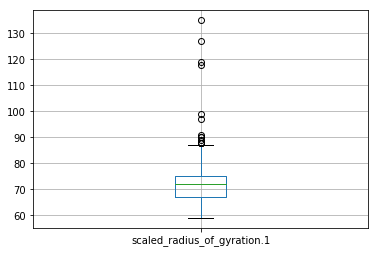

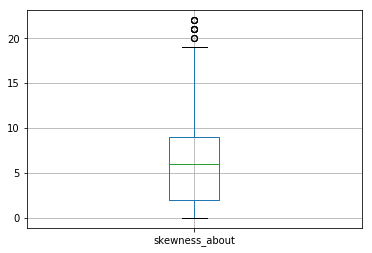

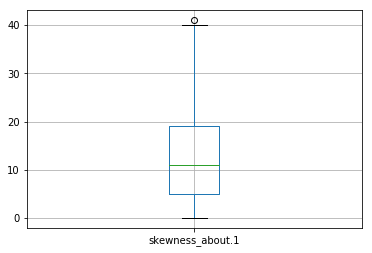

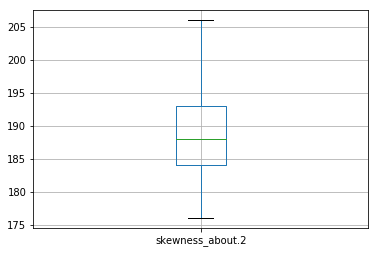

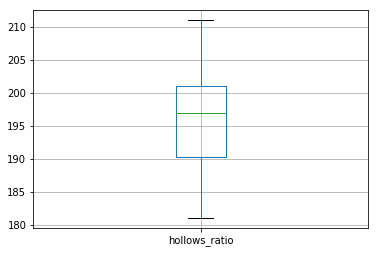

In [5]:
for column in df:
    if(df[column].dtypes != 'object'):
        plt.figure()
        df.boxplot([column])

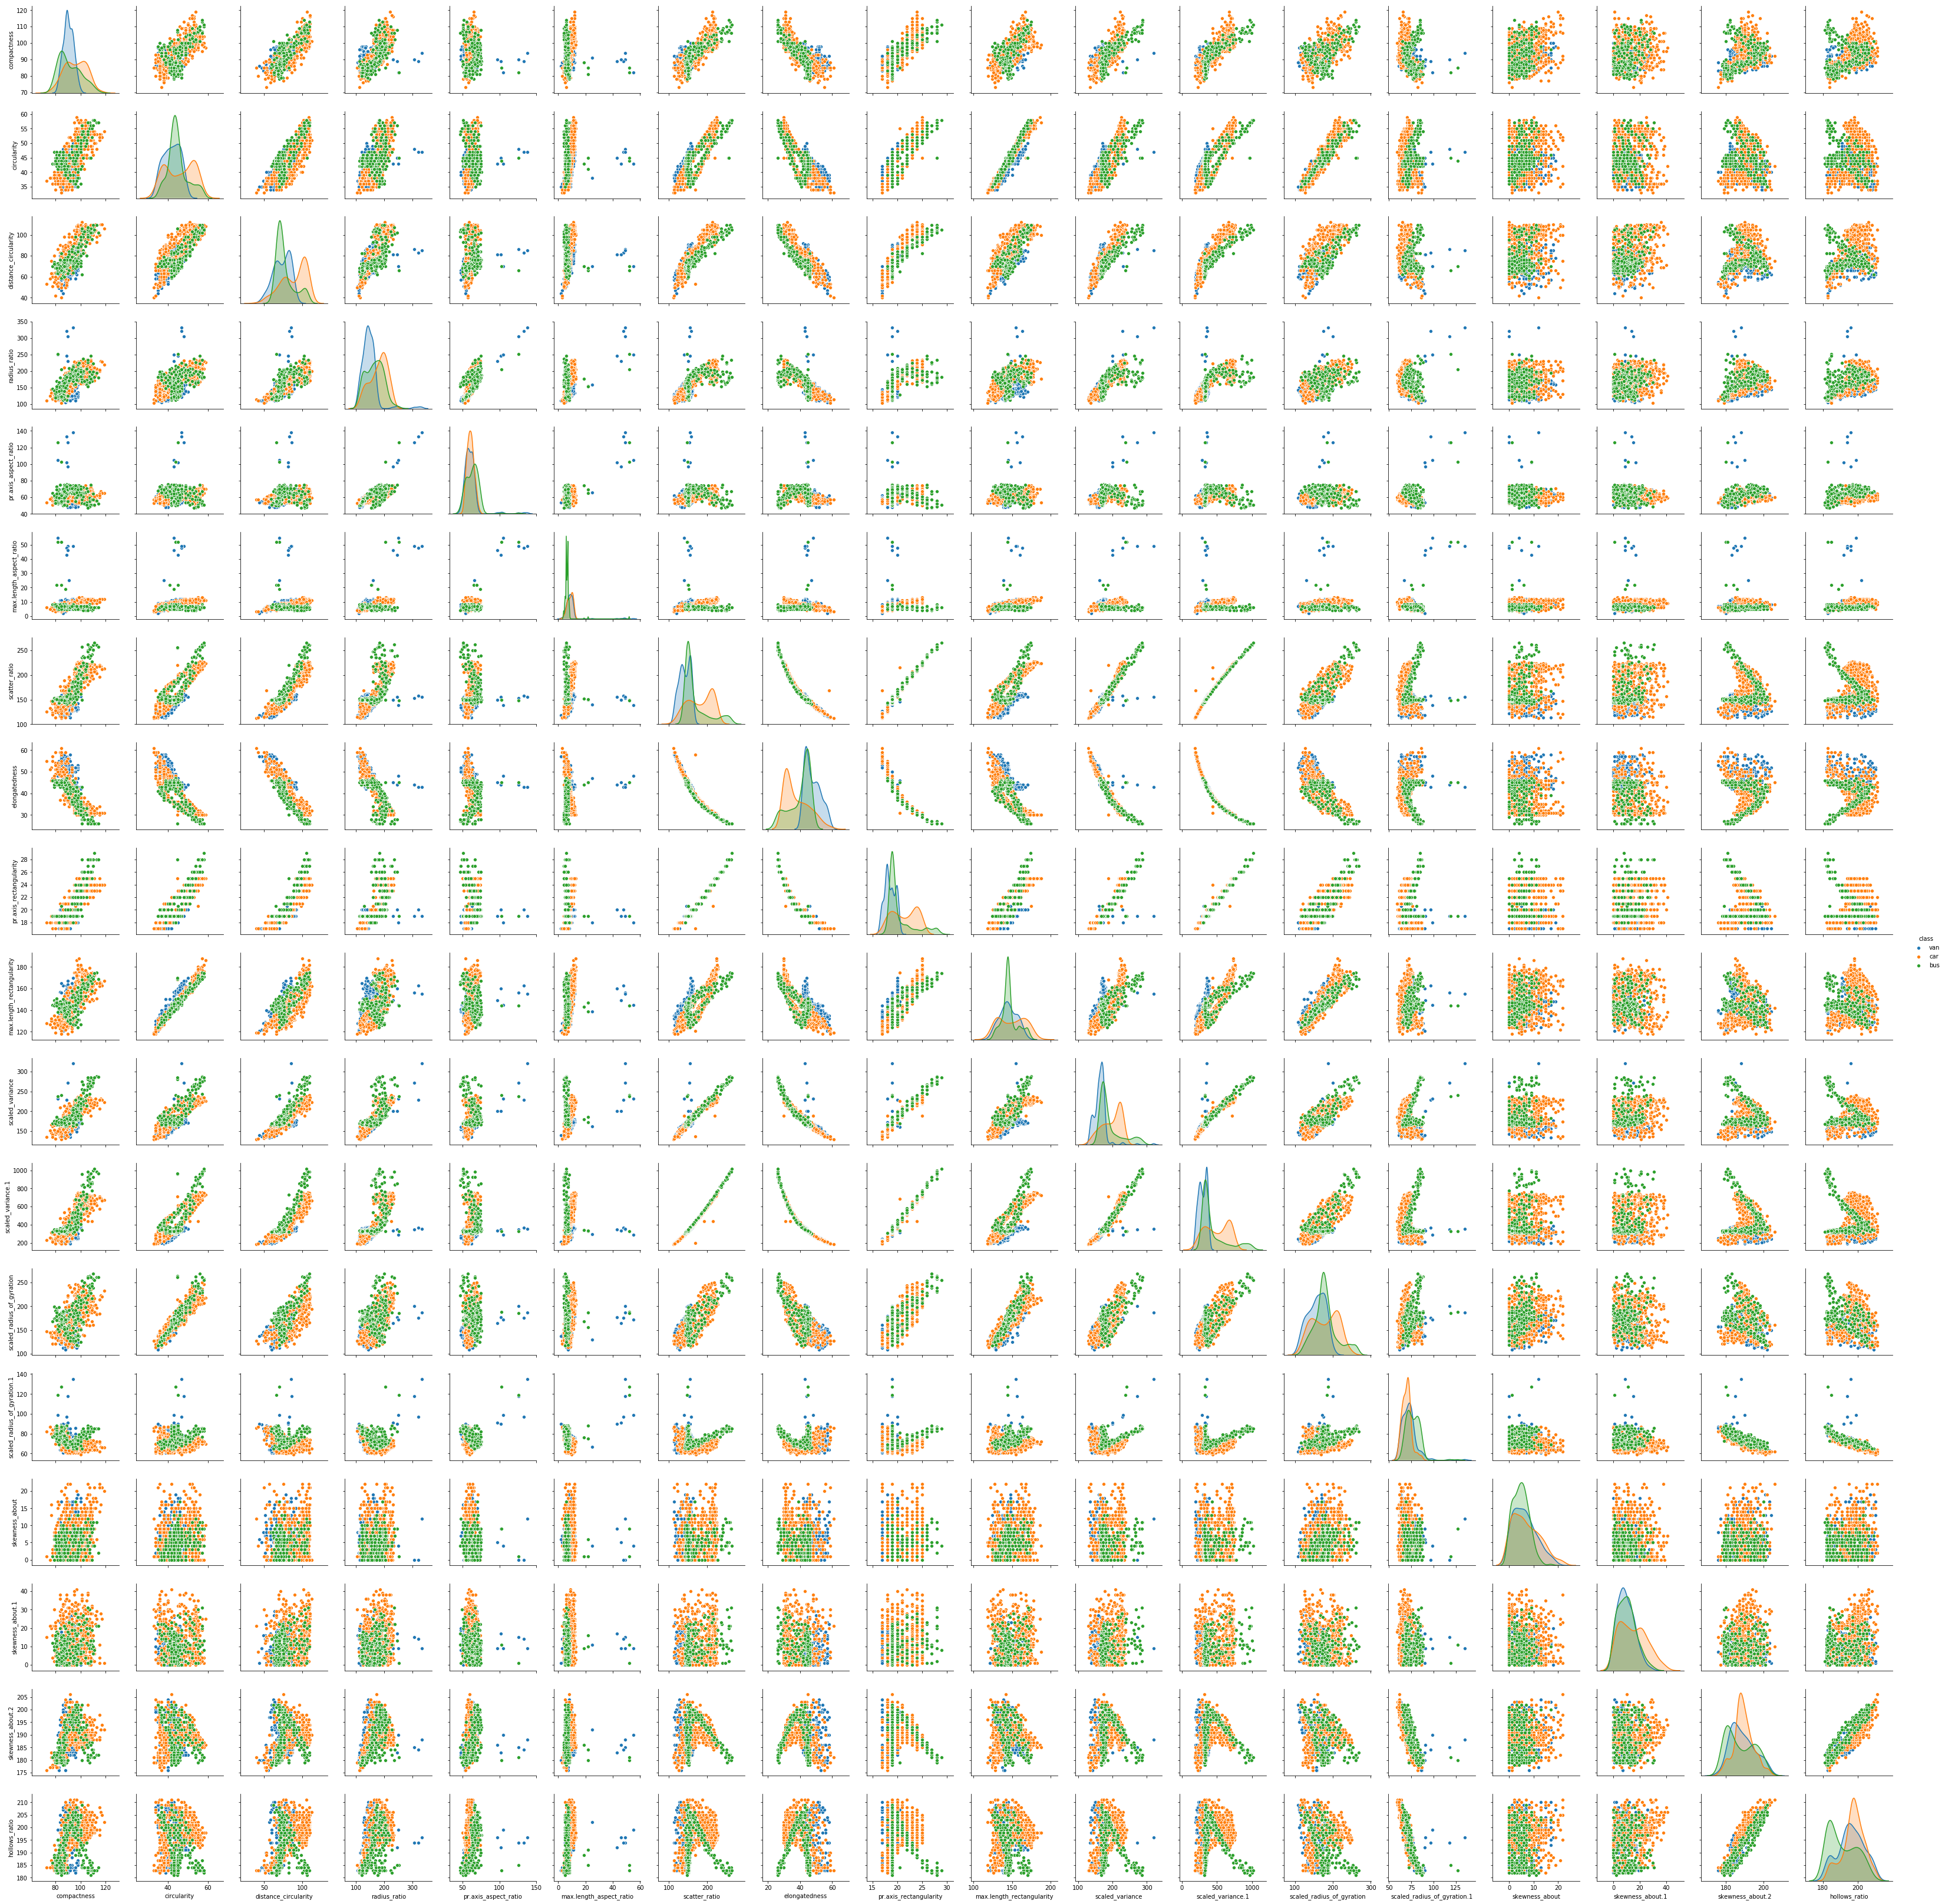

In [6]:
import seaborn as sns
sns.pairplot(df, diag_kind = "kde", hue = "class")

#### 2. Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [7]:
# find corelation of independent variable
df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689840     0.620967              0.767079   
pr.axis_aspect_ratio            0.091704     0.153362              0.158397   
max.length_aspect_ratio         0.148249     0.251208              0.264550   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr.axis_rectangularity          0.813636     0.844972              0.893128   
max.length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.762770     0.796822              0.861980   
scaled_variance.1               0.815901     0.838525              0.887328   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration.1    -0.250071     0.052642             -0.225852   
skewness_about                  0.235687     0.144394              0.113813   
skewness_about.1                0.157387    -0.011851              0.265553   
skewness_about.2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689840              0.091704   
circularity                      0.620967              0.153362   
distance_circularity             0.767079              0.158397   
radius_ratio                     1.000000              0.663559   
pr.axis_aspect_ratio             0.663559              1.000000   
max.length_aspect_ratio          0.450036              0.648704   
scatter_ratio                    0.734228              0.103715   
elongatedness                   -0.789795             -0.183264   
pr.axis_rectangularity           0.708285              0.079395   
max.length_rectangularity        0.569205              0.127128   
scaled_variance                  0.794041              0.273414   
scaled_variance.1                0.720150              0.089620   
scaled_radius_of_gyration        0.536536              0.122111   
scaled_radius_of_gyration.1     -0.180819              0.152776   
skewness_about                   0.048720             -0.058481   
skewness_about.1                 0.173832             -0.032134   
skewness_about.2                 0.382129              0.239849   
hollows_ratio                    0.471262              0.267724   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812235   
circularity                                 0.251208       0.848207   
distance_circularity                        0.264550       0.904400   
radius_ratio                                0.450036       0.734228   
pr.axis_aspect_ratio                        0.648704       0.103715   
max.length_aspect_ratio                     1.000000       0.165967   
scatter_ratio                               0.165967       1.000000   
elongatedness                              -0.180041      -0.970723   
pr.axis_rectangularity                      0.161592       0.989370   
max.length_rectangularity                   0.305943       0.808356   
scaled_variance                             0.318955       0.948296   
scaled_variance.1                           0.143713       0.993784   
scaled_radius_of_gyration                   0.189704       0.799266   
scaled_radius_of_gyration.1                 0.295574      -0.027985   
skewness_about                              0.015439       0.074308   
skewness_about.1                            0.043489       0.213127   
skewness_about.2                           -0.

In [8]:
df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [9]:
replace_map = {'class': {'van': 1, 'car': 2, 'bus': 3}}
df.replace(replace_map, inplace=True)
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      1  
1             189.0            199      1  
2             188.0            196      2  
3             199.0            207      1  
4             180.0            183      3

In [10]:
df_filtered = pd.DataFrame()
df_filtered = df[['compactness', 'circularity', 'max.length_rectangularity', 'scaled_radius_of_gyration','skewness_about', 'class']]
df_filtered.head()

#removed remaining features becuase of multiple guassian and also because of the outliers present in it. these are observed from sns pair plot

compactness  circularity  max.length_rectangularity  \
0           95         48.0                        159   
1           91         41.0                        143   
2          104         50.0                        158   
3           93         41.0                        143   
4           85         44.0                        144   

   scaled_radius_of_gyration  skewness_about  class  
0                      184.0             6.0      1  
1                      158.0             9.0      1  
2                      220.0            14.0      2  
3                      127.0             6.0      1  
4                      188.0             9.0      3

In [11]:
#df_filtered = pd.get_dummies(df_filtered, columns=["class"]).head()

#### 3. Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X,y = df_filtered.iloc[:, :-1].values , df_filtered.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7 , random_state=0)

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

In [13]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00396825 0.68954007 0.67935544 0.60924397 0.24796985]
 [0.68954007 1.00396825 0.96481879 0.93401806 0.16716623]
 [0.67935544 0.96481879 1.00396825 0.87660107 0.17591904]
 [0.60924397 0.93401806 0.87660107 1.00396825 0.20176258]
 [0.24796985 0.16716623 0.17591904 0.20176258 1.00396825]]


In [14]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.42939308 -0.08677499  0.88895222  0.12847286 -0.03674714]
 [-0.52381409  0.14209128 -0.18532356 -0.14165404  0.80685697]
 [-0.51451889  0.12757779 -0.16198615 -0.65832448 -0.50927751]
 [-0.50186861  0.09936939 -0.34998245  0.7266902  -0.29612034]
 [-0.15696684 -0.97269204 -0.16337654 -0.04426155  0.0240963 ]]

 Eigen Values 
%s [3.46189207 0.95798487 0.45098988 0.12318799 0.02578646]


In [15]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


0         1        2         3         4
0  3.461892  0.957985  0.45099  0.123188  0.025786

In [16]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 68.96417398  88.04814136  97.03228768  99.48630923 100.        ]


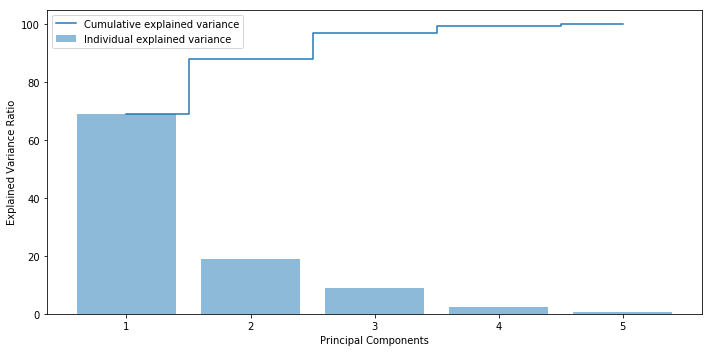

In [17]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [18]:
eig_pairs = [(eig_vals[index], eig_vecs[index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]



P_reduce = np.array(eigvectors_sort[0:3]).transpose()   # Selecting first few eigen vectors of all 14

Proj_train_data = np.dot(X_train_std,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test_std,P_reduce)  

In [19]:
#eig_pairs[0]

In [20]:
#print(y_train.shape)
#X_train_std.shape, P_reduce.shape, Proj_train_data.shape

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Proj_train_data, y_train)
predicted_values = model.predict(Proj_test_data)
print(predicted_values)
result = model.score(Proj_test_data, y_test)
print(result)

[3 2 1 2 2 2 2 3 1 2 2 2 2 2 2 3 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 3 2 1
 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 1 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 1 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 3 1 2 2
 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 3 2
 1 2 1 2 2 2 3 1 2 3 2 2 2 2 2 1 2 1 3 2 2 1 1 2 2 2 2 2 2 1 2 2 2 3 2 3 1
 2 2 2 2 2 2 3 2 3 1 2 3 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2
 2 2 1 2 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 3 2 3 2 2 1 2 1 2 2 2
 2 2 2 2 2 1 1 2 1 1 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 1 1 3 2 2 2 3 2
 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 1
 3 2 2 2 2 3 2 2 1 1 2 3 1 1 2 2 1 2 1 2 2 2 2 2 2 2 3 1 2 2 2 2 2 2 3 1 2
 1 2 2 2 2 3 2 1 2 1 2 2 2 1 1 2 2 2 2 1 2 2 2 1 2 2 2 2 1 2 2 2 1 2 1 2 2
 2 2 1 2 2 1 2 3 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 3 2
 1 1 2 3 1 2 2 1 3 2 2 2 2 2 1 2 1 2 2 2 1 1 1 2 2 2 1 2 2 2 2 1 2 2 2 1 2
 2 1 2 1 2 1 3 2 2 2 2 3 

/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper-parameters and do cross-validation to find the accuracy. (10 points)

In [22]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [23]:
def applysvm(cvalue, kernerlval):
    clf = svm.SVC(C = cvalue, kernel = kernerlval, gamma=0.001, decision_function_shape = 'ovr')
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print("SVM with C = ", cvalue ,  "; Kernel = ", kernerlval, "-- Score = ", score)

In [24]:
#apply SVC

cval = [0.01, 0.05, 0.5, 1];
kval = ['linear', 'rbf']

for c in cval:
    for k in kval:
        applysvm(c,k)

SVM with C =  0.01 ; Kernel =  linear -- Score =  0.6256323777403036
SVM with C =  0.01 ; Kernel =  rbf -- Score =  0.521079258010118
SVM with C =  0.05 ; Kernel =  linear -- Score =  0.6256323777403036
SVM with C =  0.05 ; Kernel =  rbf -- Score =  0.521079258010118
SVM with C =  0.5 ; Kernel =  linear -- Score =  0.6340640809443507
SVM with C =  0.5 ; Kernel =  rbf -- Score =  0.6863406408094435
SVM with C =  1 ; Kernel =  linear -- Score =  0.6323777403035413
SVM with C =  1 ; Kernel =  rbf -- Score =  0.6964586846543002


In [25]:
## apply SVC in GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.01, 0.05, 0.5, 1]
    gammas = [0.001]
    kval = ['linear', 'rbf']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kval}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

for i in range(2,10):
    best_param = svc_param_selection(X_train,y_train, i)
    print("with cv = ", i, " best param is = ", best_param)


with cv =  2  best param is =  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


with cv =  3  best param is =  {'C': 0.5, 'gamma': 0.001, 'kernel': 'rbf'}


/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


with cv =  4  best param is =  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


with cv =  5  best param is =  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


with cv =  6  best param is =  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


with cv =  7  best param is =  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


with cv =  8  best param is =  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
with cv =  9  best param is =  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
